# Train model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

def load_images_from_folder(folder_path, class_label, image_size):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img = Image.open(os.path.join(folder_path, filename))
        img = img.resize(image_size)  # Resize the image to the desired size
        img = np.array(img)  # Convert the image to a numpy array
        images.append(img)
        labels.append(int(class_label))
    return images, labels

main_folder_path = '/content/drive/MyDrive/faks/Neuronske/Neuronske'
image_size = (128, 128)  # Replace with the desired image size for your CNN
train_test_split_ratio = 0.2

# 2x2
two_folder_path = os.path.join(main_folder_path, 'two')
class_two_images, class_two_labels = load_images_from_folder(two_folder_path, class_label='2', image_size=image_size)
train_two_images, test_two_images, train_two_labels, test_two_labels = train_test_split(class_two_images, class_two_labels, test_size=train_test_split_ratio, random_state=42)

# 3x3
three_folder_path = os.path.join(main_folder_path, 'three')
class_three_images, class_three_labels = load_images_from_folder(three_folder_path, class_label='3', image_size=image_size)
train_three_images, test_three_images, train_three_labels, test_three_labels = train_test_split(class_three_images, class_three_labels, test_size=train_test_split_ratio, random_state=42)

# 4x4
four_folder_path = os.path.join(main_folder_path, 'four')
class_four_images, class_four_labels = load_images_from_folder(four_folder_path, class_label='4', image_size=image_size)
train_four_images, test_four_images, train_four_labels, test_four_labels = train_test_split(class_four_images, class_four_labels, test_size=train_test_split_ratio, random_state=42)

# 5x5
five_folder_path = os.path.join(main_folder_path, 'five')
class_five_images, class_five_labels = load_images_from_folder(five_folder_path, class_label='5', image_size=image_size)
train_five_images, test_five_images, train_five_labels, test_five_labels = train_test_split(class_five_images, class_five_labels, test_size=train_test_split_ratio, random_state=42)

# Concatenate the images and labels for all classes
all_images = class_two_images + class_three_images + class_four_images + class_five_images
all_labels = class_two_labels + class_three_labels + class_four_labels + class_five_labels

test_two_images, val_two_images, test_two_labels, val_two_labels = train_test_split(test_two_images, test_two_labels, test_size=0.5, random_state=49)
test_three_images, val_three_images, test_three_labels, val_three_labels = train_test_split(test_three_images, test_three_labels, test_size=0.5, random_state=49)
test_four_images, val_four_images, test_four_labels, val_four_labels = train_test_split(test_four_images, test_four_labels, test_size=0.5, random_state=49)
test_five_images, val_five_images, test_five_labels, val_five_labels = train_test_split(test_five_images, test_five_labels, test_size=0.5, random_state=49)


# Split the data into training and testing sets
train_images = train_two_images + train_three_images + train_four_images + train_five_images
test_images = test_two_images + test_three_images + test_four_images + test_five_images
val_images = val_two_images + val_three_images + val_four_images + val_five_images
train_labels = train_two_labels + train_three_labels + train_four_labels + train_five_labels
test_labels = test_two_labels + test_three_labels + test_four_labels + test_five_labels
val_labels = val_two_labels + val_three_labels + val_four_labels + val_five_labels

def to_gray(np_arr):
    gray_array = np.dot(np_arr[...,:3], [0.2989, 0.5870, 0.1140])
    gray_array = gray_array.reshape(gray_array.shape[0], gray_array.shape[1], 1)
    return gray_array.astype(np.uint8)


train_images = list(map(to_gray, train_images))
test_images = list(map(to_gray, test_images))
val_images = list(map(to_gray, val_images))

train_images = np.array(train_images) / 255
test_images = np.array(test_images) / 255
val_images = np.array(val_images) / 255
train_labels = np.array(train_labels) - 2
test_labels = np.array(test_labels) - 2
val_labels = np.array(val_labels) - 2

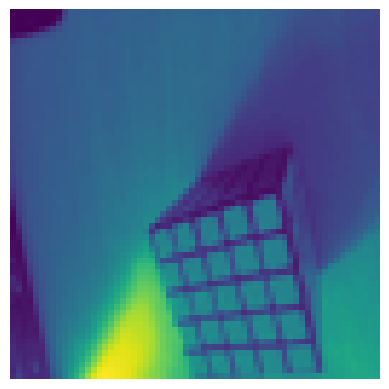

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(train_images[94])
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.5,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

batch_size = 32
aug_per_epoch = 100

In [ ]:
train_generator = datagen.flow(train_images, train_labels, batch_size=aug_per_epoch * len(train_images))
validation_generator = datagen.flow(val_images, val_labels, batch_size=aug_per_epoch * len(train_images))
test_generator = datagen.flow(test_images, test_labels, batch_size=aug_per_epoch * len(train_images))

aug_train_images = []
aug_train_labels = []
aug_val_images = []
aug_val_labels = []
aug_test_images = []
aug_test_labels = []

for i in range(aug_per_epoch):
    batch_images, batch_labels = next(validation_generator)

    aug_val_images.extend(batch_images)
    aug_val_labels.extend(batch_labels)

    batch_images, batch_labels = next(test_generator)

    aug_test_images.extend(batch_images)
    aug_test_labels.extend(batch_labels)

    batch_images, batch_labels = next(train_generator)

    aug_train_images.extend(batch_images)
    aug_train_labels.extend(batch_labels)

aug_val_images = np.array(aug_val_images)
aug_val_labels = np.array(aug_val_labels)

aug_test_images = np.array(aug_test_images)
aug_test_labels = np.array(aug_test_labels)

aug_train_images = np.array(aug_train_images)
aug_train_labels = np.array(aug_train_labels)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import LearningRateScheduler, LambdaCallback, Callback
from tensorflow.keras.initializers import HeNormal


np.random.seed(42)
tf.random.set_seed(42)

# Drop learning rate *0.1 (or 0.5) on 0.73 val acc
# Increase data
# L1 loss
# 0.01 regularization
# Min pool
# Max pool 4x4
#

model = models.Sequential([
    Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeNormal(1), input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeNormal(2)),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', kernel_initializer=HeNormal(3)),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', kernel_initializer=HeNormal(3)),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(4000, activation='relu', kernel_regularizer=l2(0.05), kernel_initializer=HeNormal(4)),
    Dropout(0.5),
    Dense(8000, activation='relu', kernel_regularizer=l2(0.05), kernel_initializer=HeNormal(5)),
    Dropout(0.5),
    Dense(1000, activation='relu', kernel_regularizer=l2(0.05), kernel_initializer=HeNormal(6)),
    Dropout(0.5),

    Dense(4, activation='softmax')
])

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

decay_count = 0
batch_size = 32
epochs = 200
val_accuracy = 0.0

def learning_rate_schedule(epoch, lr):
    global decay_count
    if val_accuracy > 0.8 and decay_count == 0:
        decay_count += 1
        return lr * 0.1

    if val_accuracy > 0.98 and decay_count == 1:
        decay_count += 1
        return lr * 0.5

    return lr

def update_val_accuracy(epoch, logs):
    global val_accuracy
    val_accuracy = logs['val_accuracy']



class RestartTrainingCallback(Callback):
    def __init__(self, restart_threshold, restart_epochs):
        super(RestartTrainingCallback, self).__init__()
        self.restart_threshold = restart_threshold
        self.restart_epochs = restart_epochs
        self.best_val_accuracy = 0.0
        self.epochs_since_restart = 0

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get('val_accuracy')

        if val_accuracy is None:
            return

        if val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = val_accuracy
            self.epochs_since_restart = 0
        else:
            self.epochs_since_restart += 1

        if self.epochs_since_restart >= self.restart_epochs and val_accuracy <= self.restart_threshold:
            print("Restarting training due to low validation accuracy.")
            self.model.stop_training = True

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.summary()

restart_threshold = 0.25
restart_epochs = 7
restart_callback = RestartTrainingCallback(restart_threshold, restart_epochs)

lr_scheduler = LearningRateScheduler(learning_rate_schedule)
lambda_callback = LambdaCallback(on_epoch_end=update_val_accuracy)

history = model.fit(
    aug_train_images,
    aug_train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(aug_val_images, aug_val_labels),
    callbacks=[restart_callback, lr_scheduler, lambda_callback]
)

test_loss, test_accuracy = model.evaluate(aug_test_images, aug_test_labels)

print(f"Test accuracy: {test_accuracy}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 128)     1280      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 256)     

313/313 [==============================] - 26s 73ms/step - loss: 494.9382 - accuracy: 0.2684 - val_loss: 105.7421 - val_accuracy: 0.3400 - lr: 1.0000e-04
Epoch 2/200
313/313 [==============================] - 22s 69ms/step - loss: 37.0698 - accuracy: 0.3978 - val_loss: 7.5211 - val_accuracy: 0.4375 - lr: 1.0000e-04
Epoch 3/200
313/313 [==============================] - 22s 69ms/step - loss: 3.1731 - accuracy: 0.4601 - val_loss: 1.5275 - val_accuracy: 0.5300 - lr: 1.0000e-04
Epoch 4/200
313/313 [==============================] - 22s 70ms/step - loss: 1.2719 - accuracy: 0.5197 - val_loss: 1.2603 - val_accuracy: 0.5612 - lr: 1.0000e-04
Epoch 5/200
313/313 [==============================] - 22s 70ms/step - loss: 1.1689 - accuracy: 0.5472 - val_loss: 1.2209 - val_accuracy: 0.5612 - lr: 1.0000e-04
Epoch 6/200
313/313 [==============================] - 23s 72ms/step - loss: 1.0683 - accuracy: 0.6176 - val_loss: 1.1694 - val_accuracy: 0.6181 - lr: 1.0000e-04
Epoch 7/200
313/313 [==============

In [ ]:
model.save('rubix_model.h5')

# util

38/38 [==============================] - 1s 16ms/step


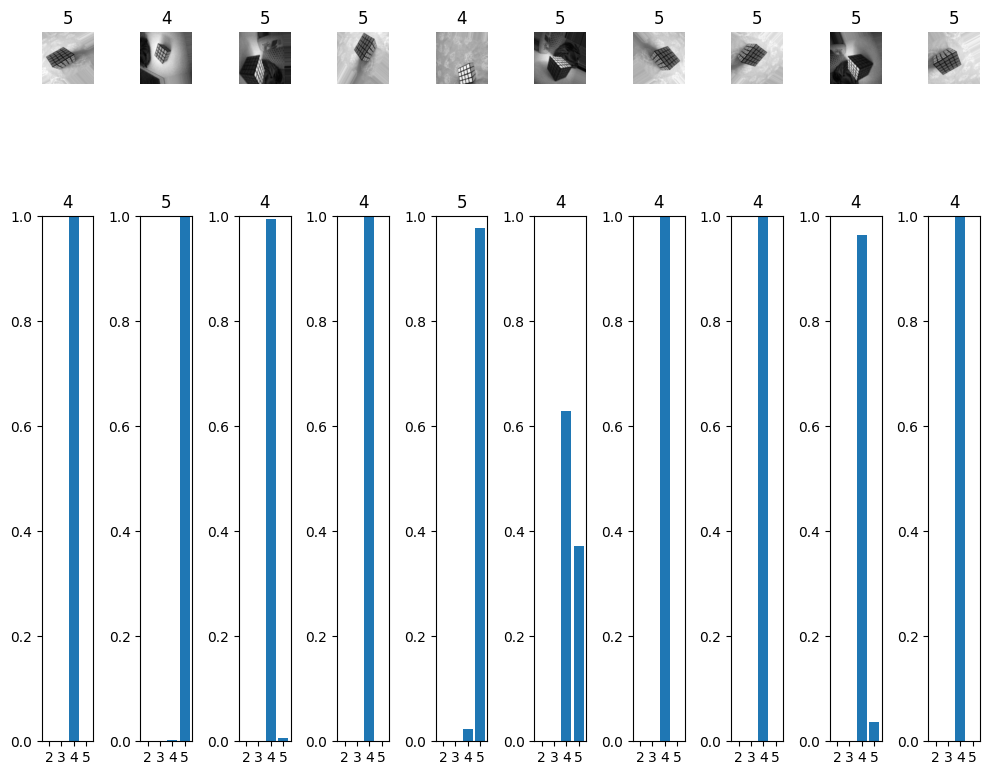

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(aug_test_images)
predicted_labels = np.argmax(predictions, axis=1)
wrong_indices = np.where(predicted_labels != aug_test_labels)[0]
num_display = min(10, len(wrong_indices))

plt.figure(figsize=(10, 10))

page=6

for i, idx in enumerate(wrong_indices[page*num_display:(page+1)*num_display]):
    plt.subplot(2, num_display, i + 1)
    plt.imshow(aug_test_images[idx], cmap='gray')
    plt.title(f'{aug_test_labels[idx] + 2}')
    plt.axis('off')

    plt.subplot(2, num_display, num_display + i + 1)
    plt.bar(range(4), predictions[idx], tick_label=['2', '3', '4', '5'])
    plt.title(f'{predicted_labels[idx] + 2}')
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

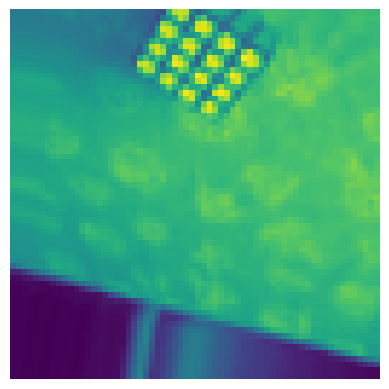

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(aug_test_images[wrong_indices[14]])
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.regularizers import l2

# 0.4 val acc batch 32, aug 200
model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.05)),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

model.summary()


# few 0.5 val acc batch 32, aug 200 on epoch ~300 (0.95 train acc) (otherwise 0.45 val acc)
model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.05)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.05)),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])


# 0.55 val acc on 5 epoch (stays same after 5 epochs)
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),

    Dense(4, activation='softmax')
])

# 0.65 val acc (peaks 0.7)
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    Dense(32, activation='relu'),
    Dropout(0.5),

    Dense(4, activation='softmax')
])

# 0.68 val acc (peaks 0.7)
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(1024, activation='relu', kernel_regularizer=l2(0.005)),
    Dropout(0.5),

    Dense(32, activation='relu'),
    Dropout(0.5),

    Dense(4, activation='softmax')
])

In [ ]:
timg = []
tlbl = []

for i in range(len(aug_test_images)):
    if aug_test_labels[i] == 0:
        timg.append(aug_test_images[i])
        tlbl.append(aug_test_labels[i])

timg = np.array(timg)
tlbl = np.array(tlbl)

test_loss, test_accuracy_2 = model.evaluate(timg, tlbl)

print(f"Test accuracy: {test_accuracy_2}")

10/10 [==============================] - 0s 19ms/step - loss: 1.5194 - accuracy: 0.7433
Test accuracy: 0.7433333396911621


In [ ]:
timg = []
tlbl = []

for i in range(len(aug_test_images)):
    if aug_test_labels[i] == 1:
        timg.append(aug_test_images[i])
        tlbl.append(aug_test_labels[i])

timg = np.array(timg)
tlbl = np.array(tlbl)

test_loss, test_accuracy_3 = model.evaluate(timg, tlbl)

print(f"Test accuracy: {test_accuracy_3}")

10/10 [==============================] - 0s 18ms/step - loss: 0.1626 - accuracy: 0.9867
Test accuracy: 0.9866666793823242


In [ ]:
timg = []
tlbl = []

for i in range(len(aug_test_images)):
    if aug_test_labels[i] == 2:
        timg.append(aug_test_images[i])
        tlbl.append(aug_test_labels[i])

timg = np.array(timg)
tlbl = np.array(tlbl)

test_loss, test_accuracy_4 = model.evaluate(timg, tlbl)

print(f"Test accuracy: {test_accuracy_4}")

10/10 [==============================] - 0s 16ms/step - loss: 2.3542 - accuracy: 0.5233
Test accuracy: 0.5233333110809326


In [ ]:
timg = []
tlbl = []

for i in range(len(aug_test_images)):
    if aug_test_labels[i] == 3:
        timg.append(aug_test_images[i])
        tlbl.append(aug_test_labels[i])

timg = np.array(timg)
tlbl = np.array(tlbl)

test_loss, test_accuracy_5 = model.evaluate(timg, tlbl)

print(f"Test accuracy: {test_accuracy_5}")

10/10 [==============================] - 0s 16ms/step - loss: 2.4093 - accuracy: 0.5633
Test accuracy: 0.5633333325386047


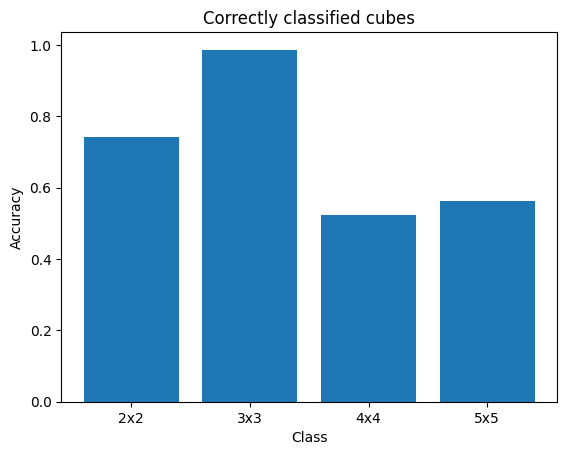

In [ ]:
import matplotlib.pyplot as plt

labels = ['2x2', '3x3', '4x4', '5x5']
values = [test_accuracy_2, test_accuracy_3, test_accuracy_4, test_accuracy_5]

plt.bar(labels, values)

plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Correctly classified cubes')

plt.show()

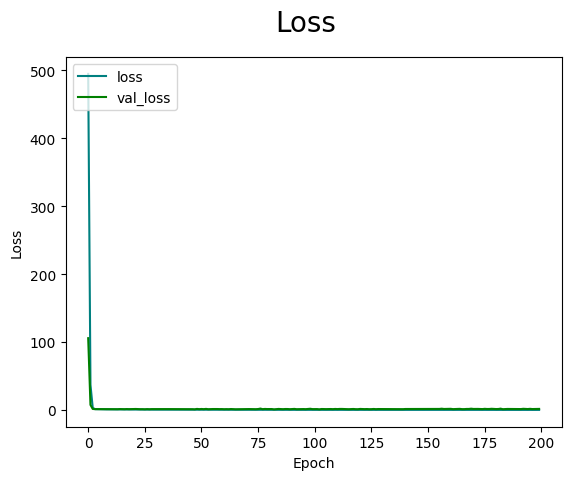

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)

plt.legend(loc = "upper left")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

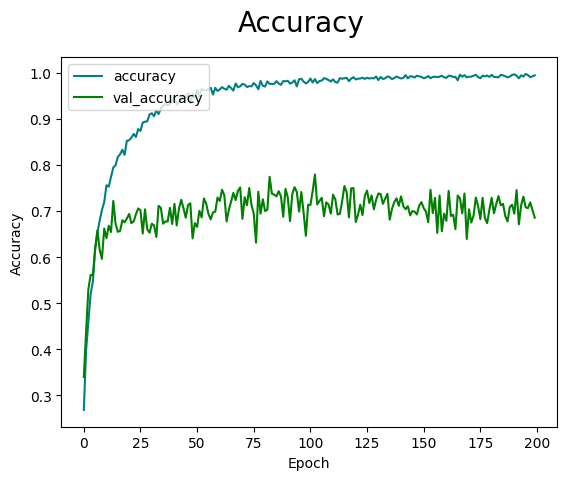

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'green', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)

plt.legend(loc = "upper left")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from google.colab import files
import io
from PIL import Image

# Prompt the user to upload an image
print("Please upload an image:")
uploaded = files.upload()

# Access the uploaded image
uploaded_image = next(iter(uploaded.values()))
img = Image.open(io.BytesIO(uploaded_image))
img = img.resize(image_size)  # Resize the image to the desired size

plt.imshow(img)

img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)  # Add batch dimension

plt.axis('off')  # Turn off axis ticks and labels
plt.show()

predction = np.argmax(model.predict(img)) + 2
print(f"Predicted size: { predction }x{ predction }")

In [ ]:
import matplotlib.pyplot as plt

# Function to plot a grid of images
def plot_images(images, labels, num_rows=10, num_cols=10):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            if index < len(images):
                axes[i, j].imshow(images[index])
                axes[i, j].set_title(labels[index])
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Plot all the images
#plot_images(all_images, all_labels)